In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error

https://www.kaggle.com/datasets/devansodariya/student-performance-data

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [5]:
df['G1'] = df['G1'].astype(int)
df['G2'] = df['G2'].astype(int)
df['G3'] = df['G3'].astype(int)

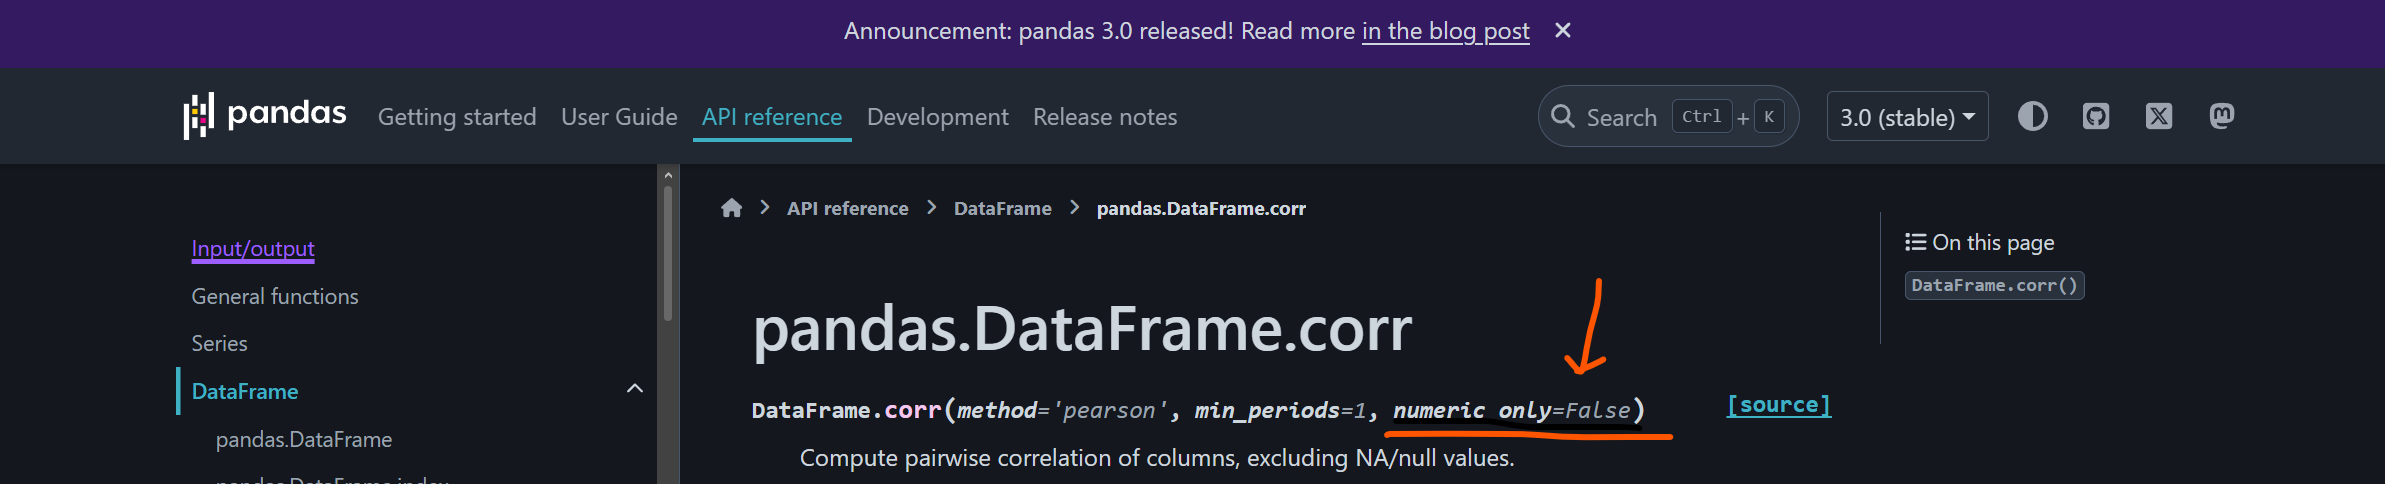

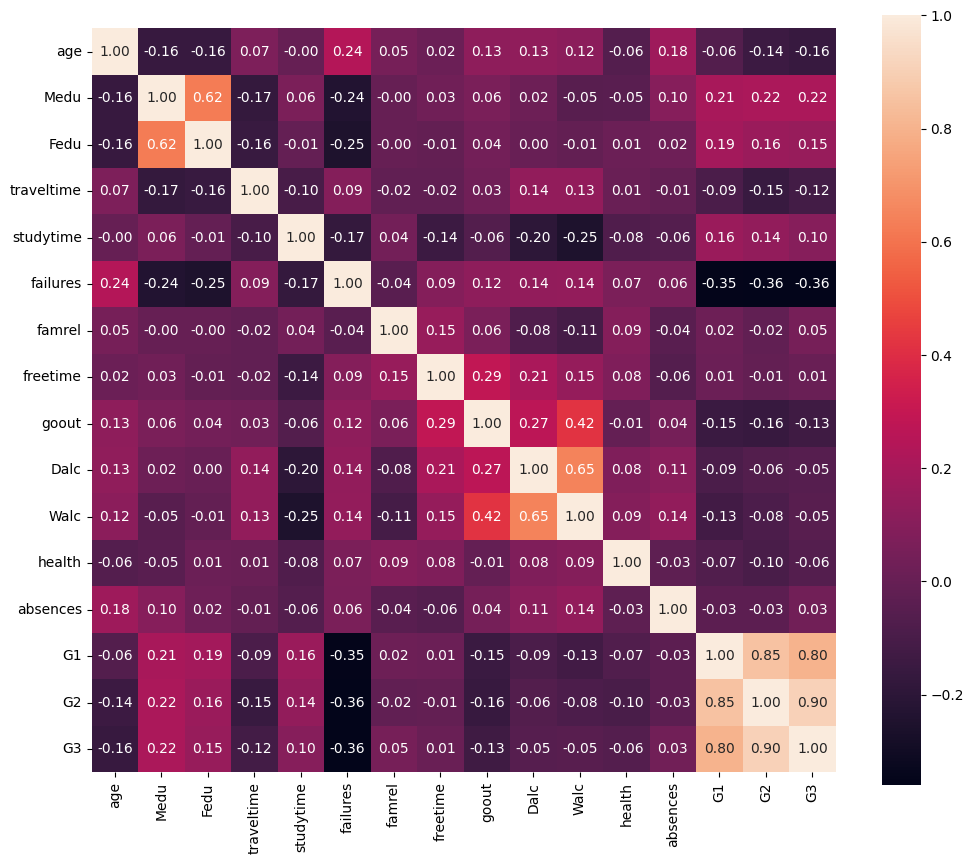

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), fmt='.2f', square=True, annot=True)
plt.show()

## Подготовка данных

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['G1', 'G2', 'G3']), df['G3'], test_size=0.2, random_state=42)

In [8]:
categorical_features = df.drop(columns=['G1', 'G2', 'G3']).select_dtypes(include= object).columns.values
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [9]:
numeric_features = df.drop(columns=['G1', 'G2', 'G3']).select_dtypes(exclude= object).columns.values
numeric_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'], dtype=object)

In [10]:
from sklearn.pipeline import make_pipeline  # Конвейер подготовки данных
from sklearn.pipeline import Pipeline  # Конвейер алгоритмов
from sklearn.impute import SimpleImputer  # Пропуски заполняются медианными значениями
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Onehot encoding и стандартизации
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
# Конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"),
                                    StandardScaler())

# Конвейер подготовки данных категориального типа
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, numeric_features),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            categorical_features
        )
    ],
    verbose_feature_names_out = False,
)
# Подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # Подготовка
    ('alg', RandomForestRegressor())
])

# Обучение алгоритма
alg.fit(X_train, y_train)

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object))],
                                   verbose_feature_names_out=False)),
                ('alg', RandomForestRegressor())])

In [11]:
# Предсказания
preds = alg.predict(X_test)

# Коэффициент детерминации и медианна абсолютная ошибка
r2_score(y_test, preds), median_absolute_error(y_test, preds)

(0.2861952567749195, np.float64(2.4299999999999997))

In [12]:
# Среднее и стандартное отклонение целевой переменной
y_test.mean(), y_test.std()

(np.float64(10.772151898734178), 4.557184710920929)

## Grid search

Гиперапараметры решающего леса: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [13]:
parameters = {
    # Название этпапа подготовки__гиперпараметр: [сетка (список) параметров]
    'alg__n_estimators': [100, 300, 500, 1000],
    'alg__min_samples_leaf': [1, 2, 4, 6],
    'alg__max_features': [1.0, 'sqrt', 'log2']
}

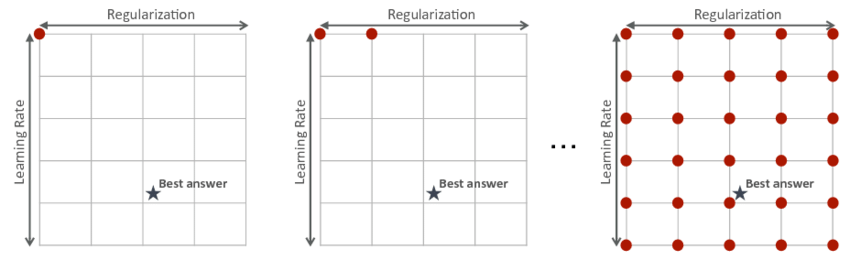

In [14]:
from sklearn.model_selection import GridSearchCV
# Сетка гиперпараметров
gs = GridSearchCV(alg,  # Выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters,  # Сетка гиперпараметров
                  cv=5,  # Количество фолдов кросс-валидации
                  verbose=2,  # Отображать процесс перебора гиперпараметров
                  n_jobs=-1)  # Параллелизм вычислений

gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'alg__max_features': 1.0,
 'alg__min_samples_leaf': 1,
 'alg__n_estimators': 1000}

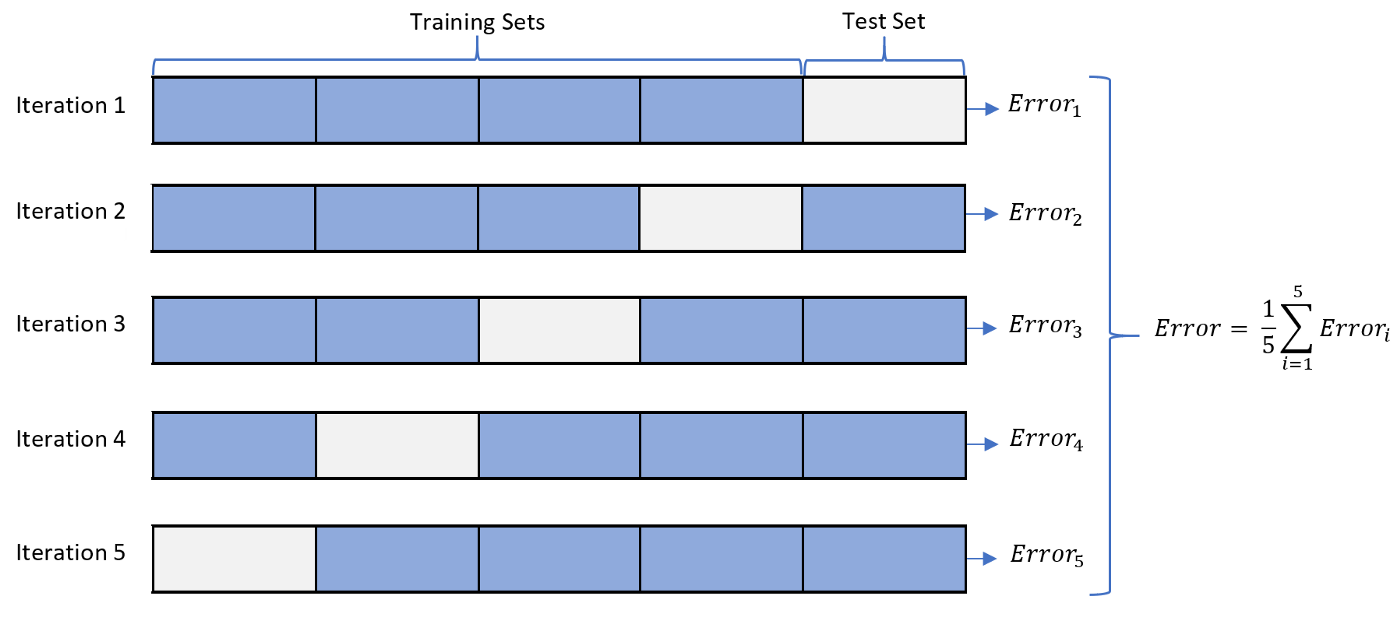

In [15]:
gs.cv_results_

{'mean_fit_time': array([1.23830609, 3.82959743, 3.98279734, 6.00252304, 0.49800196,
        1.39763513, 2.8499156 , 5.11677189, 0.40547366, 1.13372908,
        2.26502099, 3.93002186, 0.47669559, 1.36479573, 1.73245959,
        4.0632494 , 0.37428832, 0.87118907, 1.62745199, 3.30272427,
        0.42996449, 0.8930223 , 1.72662263, 2.59597387, 0.27006578,
        1.24060702, 1.31351695, 2.63556848, 0.37337546, 0.9859179 ,
        1.2016046 , 2.61586728, 0.4452033 , 0.95867519, 1.35527844,
        3.23877387, 0.27948241, 0.78328633, 1.28123269, 3.03289676,
        0.2782124 , 0.74184799, 1.20539055, 2.87951474, 0.26966286,
        0.72585187, 1.19058962, 2.73762093]),
 'std_fit_time': array([0.2568932 , 0.55995506, 0.70129288, 0.57175343, 0.02085643,
        0.01417525, 0.36522748, 0.57069718, 0.01100056, 0.01870578,
        0.35269052, 0.26633376, 0.13501321, 0.31454151, 0.01674999,
        0.65147158, 0.07545381, 0.02609178, 0.40525937, 0.53377621,
        0.15913704, 0.17039357, 0.440

Модуль кросс-валидации

In [16]:
preds = gs.best_estimator_.predict(X_test)

r2_score(y_test, preds), median_absolute_error(y_test, preds)

(0.30536213143500135, np.float64(2.4860000000000007))